# The Simpsons: Data scrape and visualisation of quality over time

In this notebook, I intend to scrape IMBD user ratings for episodes of "The Simpsons" to explore the percieved quality of the episodes over time. 

In [ ]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# Initializing the series' that the loop will populate
simpsons_episodes = []

# For every season in the series
for sn in range(1,32):
    # Request the server the content of the web page by using get(), and store the server’s response in the variable response
    response = get('https://www.imdb.com/title/tt0096697/episodes?season=' + str(sn))

    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the episode containers from the season page
    episode_containers = page_html.find_all('div', class_ = 'info')

    # For each episode in each season
    for episodes in episode_containers:
            # Get the info of each episode on the page
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
            # Compiling the episode info
            episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]

            # Append the episode info to the complete dataset
            simpsons_episodes.append(episode_data)

In [47]:
simpsons_episodes = pd.DataFrame(simpsons_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])

#formatting seasons with leading 0
for i in simpsons_episodes.index: #row
    simpsons_episodes.loc[i, 'season'] = "{:02d}".format(simpsons_episodes.loc[i, 'season'])
    
simpsons_episodes

,season,episode_number,title,airdate,rating,total_votes,desc
0,01,1,Simpsons Roasting on an Open Fire,2 Sep. 1990,8.2,"(5,745)",The family is forced to spend all of their sav...
1,01,2,Bart the Genius,14 Jan. 1990,7.7,"(3,680)",Bart ends up at a school for gifted children a...
2,01,3,Homer's Odyssey,21 Jan. 1990,7.4,"(3,227)","After losing his job, Homer contemplates endin..."
3,01,4,There's No Disgrace Like Home,28 Jan. 1990,7.7,"(3,164)",After being embarrassed by the rest of the fam...
4,01,5,Bart the General,4 Feb. 1990,8.0,"(3,209)",After being beaten up by Nelson Muntz one too ...
...,...,...,...,...,...,...,...
678,31,18,The Incredible Lightness of Being a Baby,1 May 2020,6.3,(291),"Maggie reunites with baby Hudson, but Marge is..."
679,31,19,Warrin' Priests,8 May 2020,6.0,(364),Reverend Lovejoy investigates the mysterious p...
680,31,20,Warrin' Priests Part 2,15 May 2020,5.7,(332),"In Michigan, Reverend Lovejoy learns the true ..."
681,31,21,The Hateful Eight-Year-Olds,22 May 2020,6.7,(314),Lisa joins a group of rich girls when she make...


In [48]:
#removing extra characters from total votes
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes

#correcting typing
simpsons_episodes['total_votes'] = simpsons_episodes.total_votes.apply(remove_str).astype(int)
simpsons_episodes['rating'] = simpsons_episodes.rating.astype(float)

simpsons_episodes.head()

In [43]:
simpsons_episodes.groupby('season').describe()

rating                                                   total_votes  \
        count      mean       std  min    25%   50%    75%  max       count   
season                                                                        
01       13.0  7.769231  0.292645  7.4  7.600  7.70  7.800  8.4        13.0   
02       22.0  8.050000  0.350170  7.5  7.825  8.05  8.300  8.8        22.0   
03       24.0  8.195833  0.322327  7.7  7.900  8.25  8.350  8.8        24.0   
04       22.0  8.313636  0.491156  7.1  8.100  8.20  8.650  9.1        22.0   
05       22.0  8.386364  0.402723  7.5  8.200  8.40  8.600  9.2        22.0   
06       25.0  8.376000  0.643739  5.9  8.100  8.50  8.700  9.2        25.0   
07       25.0  8.368000  0.403856  7.5  8.100  8.40  8.600  9.0        25.0   
08       25.0  8.256000  0.541664  7.2  7.900  8.10  8.600  9.3        25.0   
09       25.0  7.828000  0.714446  5.0  7.700  7.90  8.200  9.1        25.0   
10       23.0  7.608696  0.336983  7.0  7.300  7.60  7.850  8.2        23.0   
11       22.0  7.259091  0.378794  6.4  7.100  7.30  7.450  7.9        22.0   
12       21.0  7.323810  0.465730  6.6  7.000  7.20  7.500  8.6        21.0   
13       22.0  7.040909  0.526135  5.4  6.925  7.05  7.275  7.8        22.0   
14       22.0  6.986364  0.312129  6.6  6.700  7.00  7.175  7.7        22.0   
15       22.0  6.950000  0.323301  6.2  6.750  7.00  7.175  7.5        22.0   
16       21.0  6.885714  0.335091  6.1  6.700  6.90  7.100  7.4        21.0   
17       22.0  6.777273  0.353125  6.1  6.600  6.80  6.975  7.6        22.0   
18       22.0  6.813636  0.486284  5.8  6.600  6.80  7.075  8.1        22.0   
19       20.0  6.815000  0.515318  5.9  6.500  6.75  7.025  8.2        20.0   
20       21.0  6.804762  0.351392  5.9  6.600  6.90  7.100  7.2        21.0   
21       23.0  6.695652  0.384327  5.6  6.500  6.70  6.950  7.3        23.0   
22       22.0  6.622727  0.380391  5.9  6.325  6.70  6.900  7.1        22.0   
23       22.0  6.659091  0.864462  3.9  6.400  6.85  7.000  8.2        22.0   
24       22.0  6.590909  0.353094  6.0  6.300  6.60  6.900  7.2        22.0   
25       22.0  6.659091  0.458423  5.7  6.325  6.60  6.800  7.8        22.0   
26       22.0  6.531818  0.524982  5.6  6.325  6.50  6.700  7.9        22.0   
27       22.0  6.600000  0.580640  5.5  6.300  6.50  6.750  8.4        22.0   
28       21.0  6.442857  0.338484  5.8  6.200  6.40  6.700  7.1        21.0   
29       21.0  6.576190  0.402374  6.0  6.300  6.50  6.700  7.6        21.0   
30       23.0  6.034783  0.587451  4.5  5.750  6.10  6.400  7.0        23.0   
31       22.0  6.395455  0.558465  5.3  6.000  6.45  6.675  7.4        22.0   

                                                                           
               mean         std     min      25%     50%      75%     max  
season                                                                     
01      3262.538462  783.230023  2785.0  2889.00  3074.0  3208.00  5744.0  
02      2578.000000  291.097922  2219.0  2340.25  2529.0  2710.50  3241.0  
03      2342.125000  279.609870  2054.0  2158.00  2240.0  2443.75  3158.0  
04      2380.636364  408.615030  1951.0  2115.00  2254.0  2472.00  3472.0  
05      2248.590909  403.020106  1793.0  2005.75  2086.0  2486.75  3641.0  
06      2211.960000  360.632717  1815.0  1934.00  2156.0  2340.00  3164.0  
07      2068.720000  308.773450  1672.0  1831.00  1989.0  2264.00  2750.0  
08      2147.600000  651.924587  1626.0  1779.00  1883.0  2232.00  4040.0  
09      1740.440000  328.377080  1491.0  1576.00  1678.0  1797.00  3150.0  
10      1529.565217  115.207649  1349.0  1456.50  1503.0  1601.50  1784.0  
11      1376.954545  112.223619  1252.0  1286.25  1357.0  1432.25  1612.0  
12      1351.571429  165.890497  1162.0  1266.00  1294.0  1416.00  1905.0  
13      1187.272727   94.132218  1051.0  1126.75  1162.5  1252.00  1448.0  
14      1110.954545   92.809830   981.0  1031.50  1113.5  1144.00  1341.0  
15      1077.727273   76.077

In [52]:
#top 10 episodes
simpsons_episodes.sort_values('rating',ascending=False).head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
175,08,23,Homer's Enemy,10 Aug. 1997,9.3,4042,Industrious Frank Grimes starts working at the...
82,05,2,Cape Feare,10 Oct. 1993,9.2,3642,"After being released from prison on parole, Si..."
108,06,6,Treehouse of Horror V,30 Oct. 1994,9.2,3166,The family's job at Mr. Burns' country estate ...
127,06,25,Who Shot Mr. Burns? Part One,2 Jul. 1995,9.2,2927,After Mr. Burns steals oil from Springfield El...
154,08,2,You Only Move Twice,5 Jan. 1997,9.2,4012,"After moving to another town for a new job, Ho..."
178,09,1,The City of New York vs. Homer Simpson,5 Oct. 1997,9.1,3151,Homer must travel to New York to get his car b...
75,04,17,Last Exit to Springfield,11 Mar. 1993,9.1,3171,Homer becomes union leader and leads a company...
70,04,12,Marge vs. the Monorail,14 Jan. 1993,9.1,3473,After receiving a considerable donation of mon...
162,08,10,The Springfield Files,30 Mar. 1997,9.1,3030,Special Agents Mulder and Scully arrive in Spr...
61,04,3,Homer the Heretic,8 Oct. 1992,9.0,3047,"After skipping church one week, Homer decides ..."


Mean rating by season:

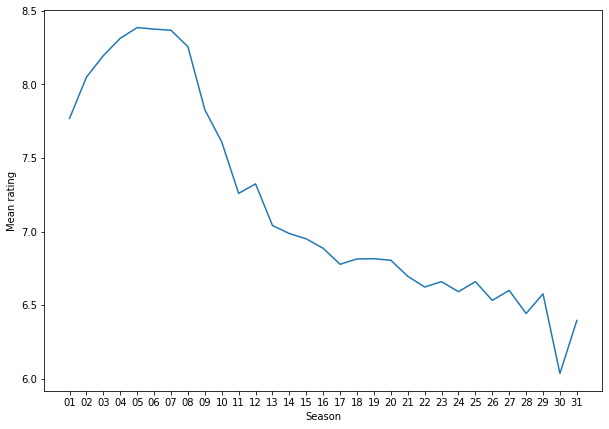

In [55]:
#mean rating by season
%matplotlib inline 

plt.figure(figsize=(10,7))
plt.xlabel('Season')
plt.ylabel('Mean rating')
plt.plot(simpsons_episodes.groupby('season').mean()['rating'])

How does number of votes compare to episode rating?

findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.


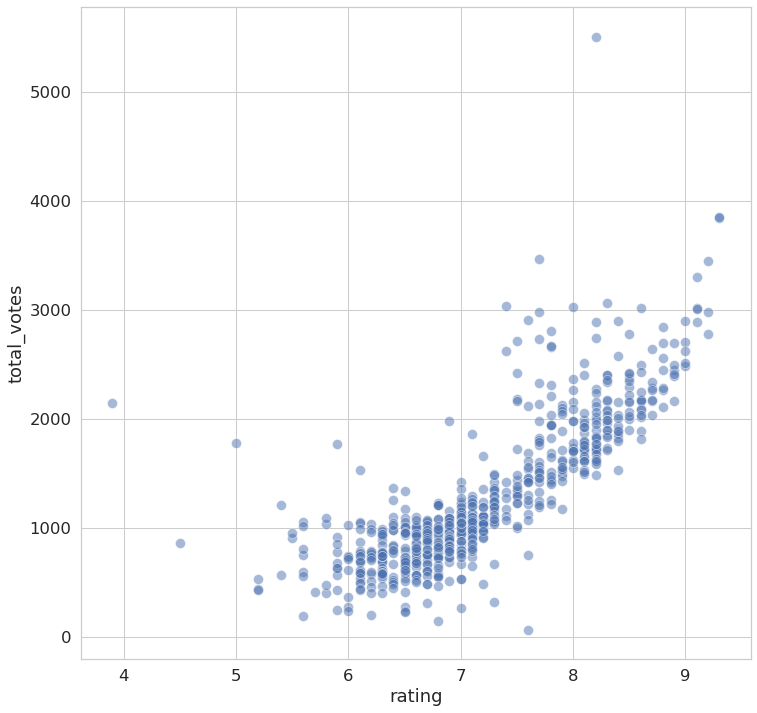

In [29]:
sns.set(font_scale=1.5,style='whitegrid')
plt.figure(figsize=(12,12))
sns.scatterplot(df.rating,df.total_votes,alpha=0.5,s=100)

So it seems users are more inclined to rate better episodes.

In [56]:
#adding leading zeroes to episode numbers too (by another method)
simpsons_episodes['episode_number'] = simpsons_episodes['episode_number'].apply(lambda num: num.zfill(2))
#simpsons_episodes['season'] = simpsons_episodes['season'].apply(lambda num: num.zfill(2))

Now, preparing a heatmap to show episode ratings through time.

In [57]:
df_heat = pd.pivot_table(data=simpsons_episodes,index=['season'],columns=['episode_number'],values=['rating'])
# df_heat.sort_values(by=['season'])
df_heat.head(35)

rating                                               ...       \
episode_number     01   02   03   04   05   06   07   08   09   10  ...   16   
season                                                              ...        
01                8.2  7.7  7.4  7.7  8.0  7.6  7.8  7.7  7.5  7.4  ...  NaN   
02                8.2  8.2  8.3  8.1  7.5  8.0  7.8  8.4  8.1  7.8  ...  7.5   
03                8.6  7.8  8.2  8.6  8.5  7.7  8.3  7.9  7.9  8.8  ...  8.3   
04                8.5  8.2  9.0  7.8  8.5  8.2  7.8  8.2  8.9  8.7  ...  8.4   
05                8.5  9.2  8.6  8.9  8.8  8.1  7.7  8.7  8.5  8.6  ...  8.5   
06                8.7  8.1  5.9  8.6  8.3  9.2  8.1  8.6  9.0  8.1  ...  8.5   
07                9.0  8.3  8.4  8.8  8.5  8.6  9.0  8.6  8.0  7.5  ...  8.2   
08                8.5  9.2  8.1  7.7  8.3  8.1  7.8  8.8  8.6  9.1  ...  8.2   
09                9.1  6.9  8.1  8.2  8.2  7.7  7.7  8.1  7.6  7.6  ...  7.6   
10                7.6  8.1  7.6  8.0  7.3  7.6  8.1  7.3  8.2  7.9  ...  7.6   
11                7.3  7.5  7.5  7.8  7.8  7.3  7.0  7.1  7.3  7.3  ...  7.3   
12                7.6  7.4  7.0  7.2  7.0  7.7  7.3  7.9  8.1  7.2  ...  6.6   
13                7.5  7.0  7.1  7.0  7.6  7.1  6.8  6.9  7.2  7.3  ...  7.7   
14                7.6  7.3  7.1  7.0  6.7  7.2  7.0  7.2  6.7  6.7  ...  7.1   
15                7.5  7.3  6.9  7.0  7.0  6.4  7.0  6.6  7.2  7.1  ...  7.0   
16                7.4  6.8  7.1  6.4  7.0  7.1  6.8  6.1  6.5  6.8  ...  7.4   
17                6.1  6.8  6.9  7.3  6.9  6.8  6.6  7.0  6.8  6.6  ...  6.3   
18                7.5  6.6  6.7  6.8  6.6  6.6  6.9  7.1  6.1  6.5  ...  7.0   
19                6.6  6.5  7.1  6.7  6.9  6.5  6.9  7.1  8.2  6.8  ...  5.9   
20                7.2  6.8  6.8  7.1  6.5  7.0  7.0  6.5  5.9  6.9  ...  7.1   
21                7.0  6.5  6.1  7.3  6.6  6.5  6.7  7.1  6.6  6.5  ...  5.6   
22                6.0  6.7  6.6  7.0  7.1  6.3  6.2  6.7  6.9  6.1  ...  5.9   
23                7.0  7.0  6.4  6.4  7.0  7.9  6.6  6.0  8.2  5.9  ...  7.2   
24                6.3  7.2  6.7  6.6  6.2  6.2  6.9  7.1  6.6  6.9  ...  6.9   
25                6.8  6.9  6.3  6.4  6.8  6.3  6.8  6.3  7.6  6.9  ...  6.7   
26                5.6  6.8  6.4  7.4  6.1  7.9  6.8  6.3  6.7  6.6  ...  6.6   
27                5.5  6.6  6.9  7.5  6.5  6.6  5.8  6.8  8.4  6.5  ...  7.0   
28                6.0  6.5  7.1  6.9  6.3  6.7  6.1  6.6  6.3  5.8  ...  6.5   
29                6.7  6.5  6.1  7.1  6.3  6.2  6.3  6.8  7.2  6.5  ...  6.3   
30                6.2  6.0  6.1  5.8  7.0  6.4  5.6  6.4  6.7  6.7  ...  5.7   
31                5.7  5.9  6.5  6.9  6.1  5.3  6.2  7.3  6.4  6.6  ...  6.5   

                                                             
episode_number   17   18   19   20   21   22   23   24   25  
season                                                       
01              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
02              7.6  8.0  8.6  7.9  8.3  7.9  NaN  NaN  NaN  
03              8.7  8.2  7.8  8.1  8.3  7.7  7.8  8.3  NaN  
04              9.1  7.1  8.1  8.1  7.7  8.2  NaN  NaN  NaN  
05              7.9  8.4  8.4  8.3  7.5  8.0  NaN  NaN  NaN  
06              7.9  8.6  8.3  8.2  8.1  8.2  8.2  8.7  9.2  
07              8.9  8.1  8.2  8.6  8.9  8.4  8.1  8.0  8.4  
08              8.0  8.9  8.2  7.6  7.9  8.1  9.3  7.2  7.9  
09              8.0  7.9  8.2  7.8  7.9  8.4  8.2  7.8  8.0  
10              7.7  7.4  7.6  7.3  7.1  7.3  8.0  NaN  NaN  
11              7.1  7.3  6.5  7.1  7.1  7.9  NaN  NaN  NaN  
12              6.8  8.6  7.2  7.2  7.0  NaN  NaN  NaN  NaN  
13              5.4  7.7  6.7  7.1  7.0  7.8  NaN  NaN  NaN  
14              7.1  6.9  6.6  6.7  6.6  7.7  NaN  NaN  NaN  
15              6.5  7.0  7.3  7.2  6.2  7.2  NaN  NaN  NaN  
16              7.1  6.6  7.2  7.0  7.2  NaN  NaN  NaN  NaN  
17              7.1  6.7  7.1  6.6  7.0  6.3  NaN  NaN  NaN  
18              7.2  5.8  6.9  6.7  8.1  7.1  NaN  NaN

In [58]:
#labels
episodenum = [*range(1,26)]
episodenum = [str(x) for x in episodenum]

seasonticks = [*range(1,33)]
seasonticks = ['Season '+str(x) for x in seasonticks]

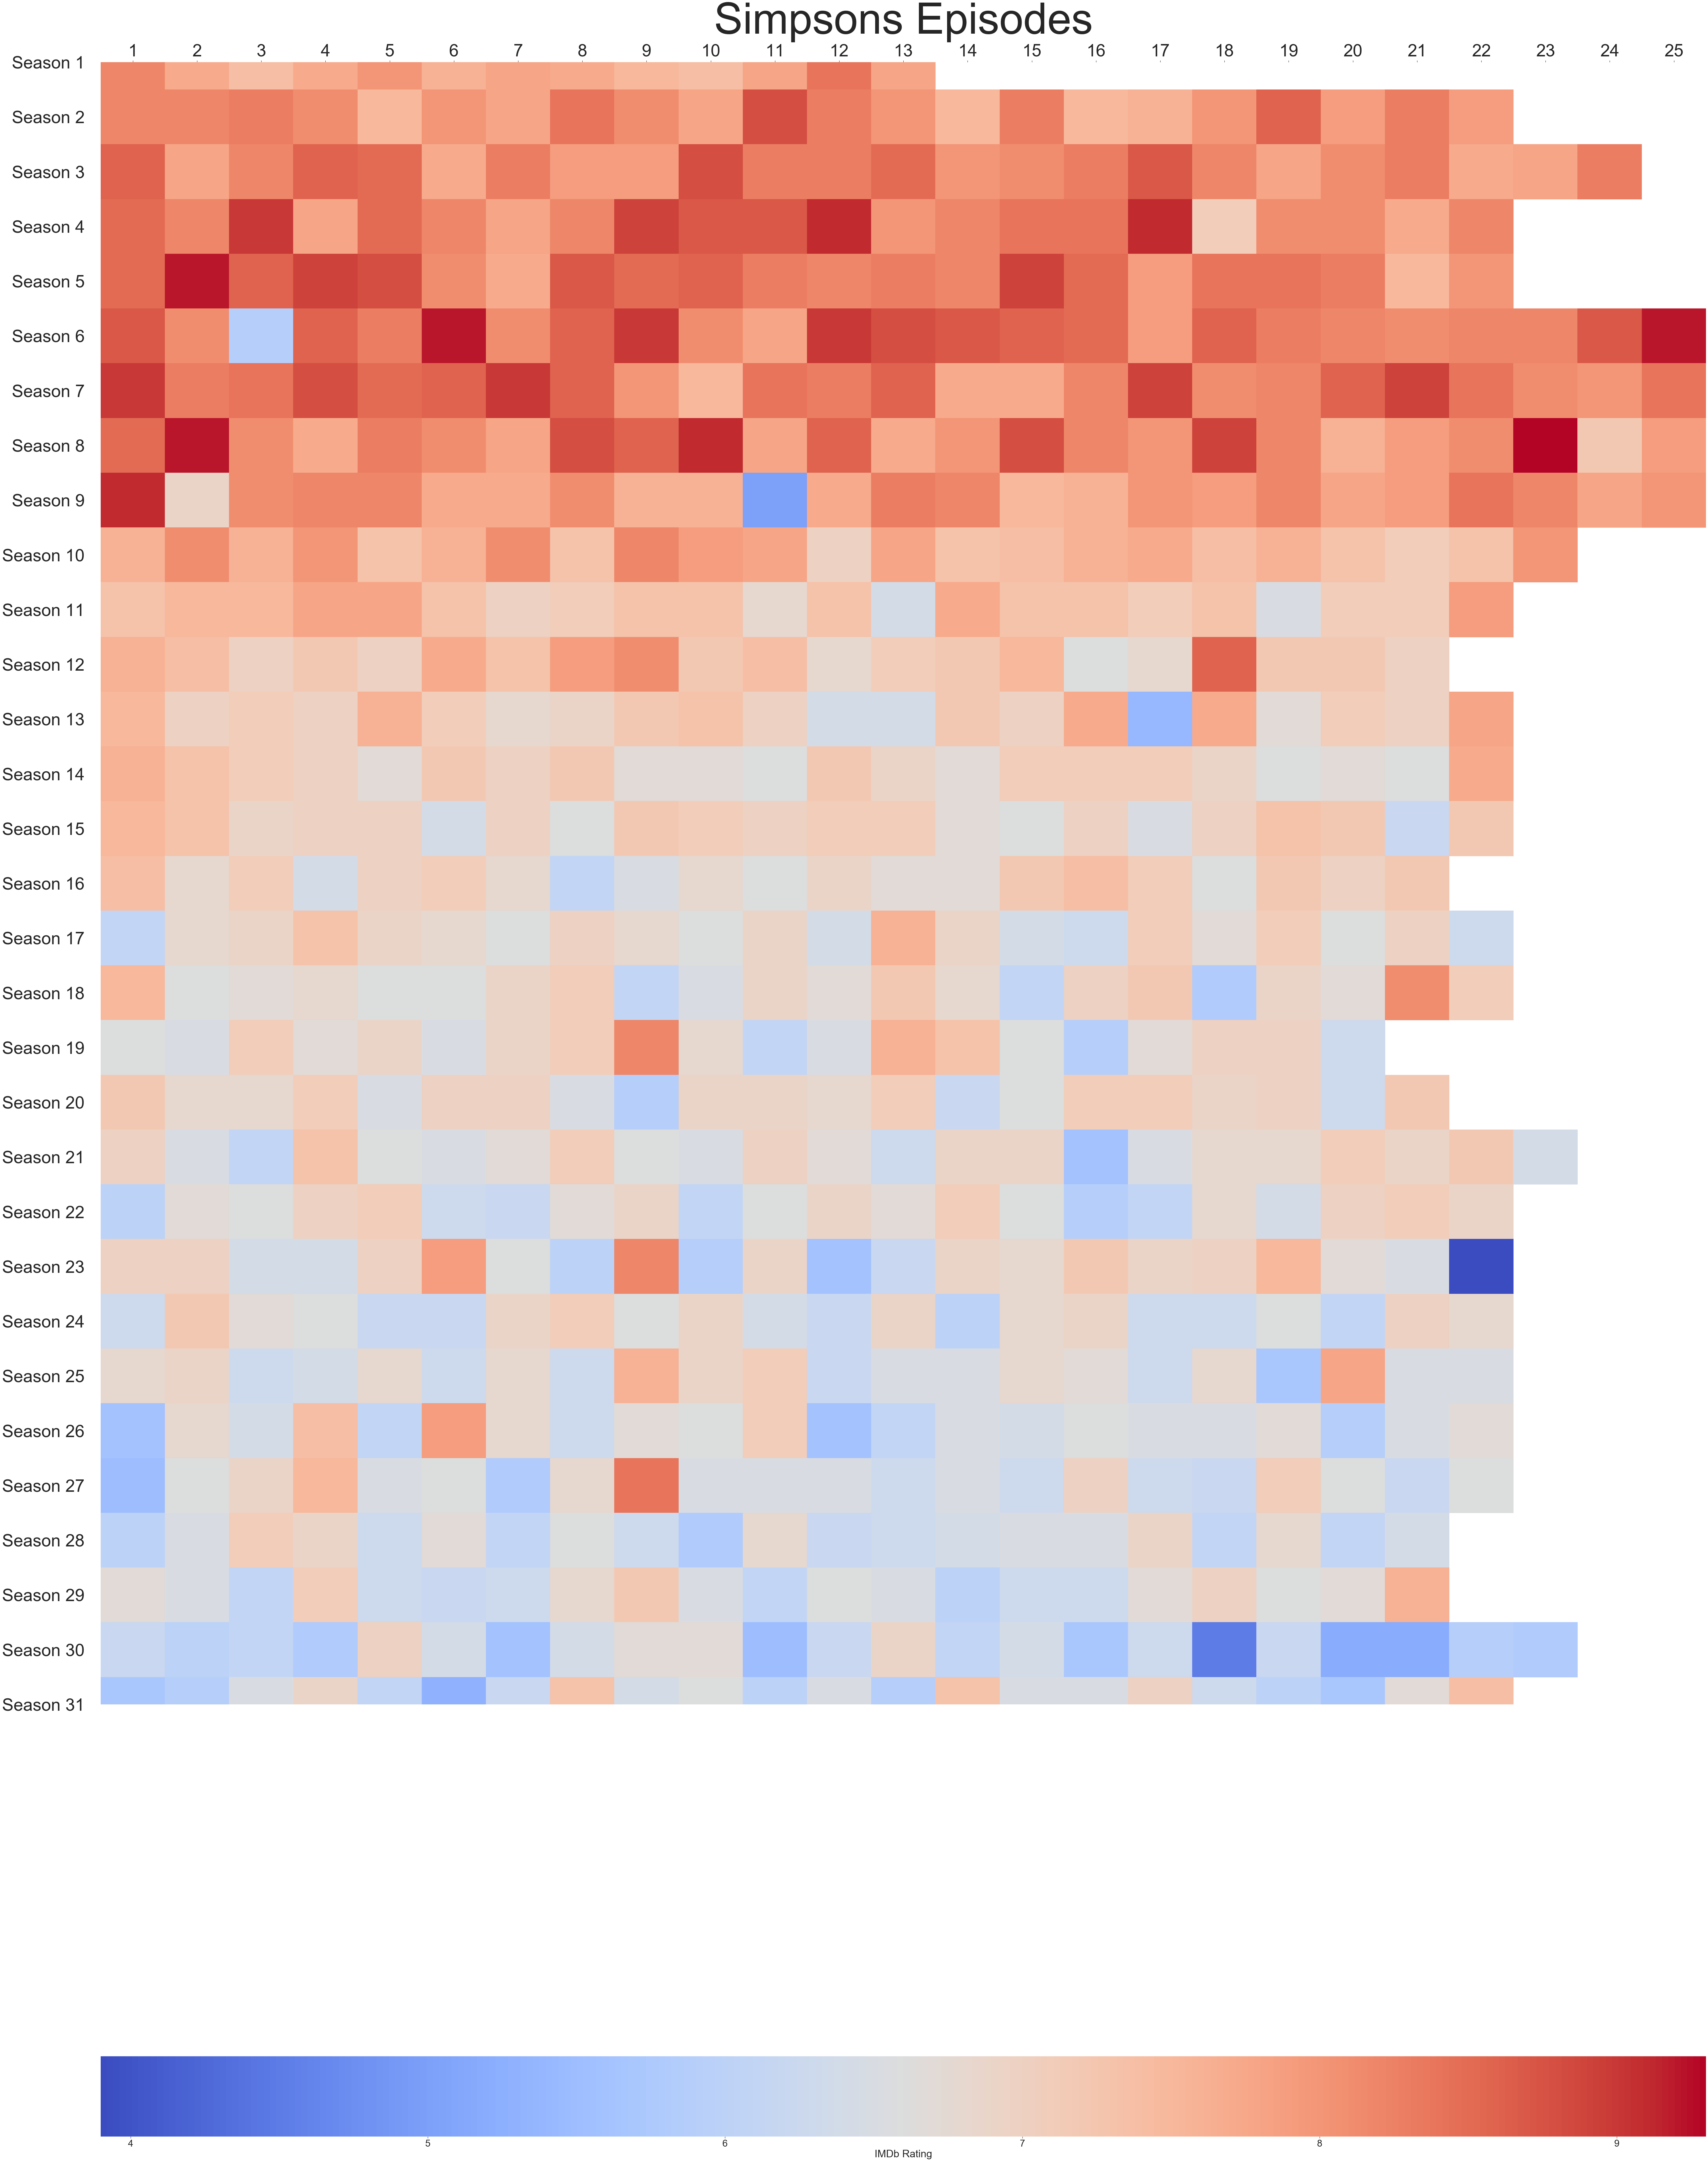

In [62]:
sns.set(font_scale=3,style='whitegrid')

plt.figure(figsize=(100,150))
fg = sns.heatmap(df_heat,cmap='coolwarm', cbar_kws={'orientation': 'horizontal', 'label': 'IMDb Rating'} )

# Moving the x-axis ticks and to the top
fg.xaxis.tick_top()
fg.set_xticklabels(episodenum,fontsize=60)
fg.set_yticklabels(seasonticks, rotation=360, horizontalalignment='right',fontsize=60)
# Adding more space between the y tick labels and the heatmap
fg.tick_params(axis='y', which='major', pad=50)
fg.set_ylabel('')    
fg.set_xlabel('')
fg.set_title('Simpsons Episodes',fontsize=150,pad=100)

plt.show()

In [52]:
#saving the image
fig = fg.get_figure()
fig.savefig('Episode Ratings Heatmap.png',dpi=50)